<a href="https://colab.research.google.com/github/Mayank1325/Customer-Analytics/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
n_features = 4
n_cluster = 5
cluster_std = 1.2
n_samples = 200

In [ ]:
data1 = make_blobs(n_samples=n_samples,n_features=n_features,centers=n_cluster,cluster_std=cluster_std)

In [ ]:
d1 = data1[0]

In [ ]:
df1=pd.DataFrame(data=d1,columns=['Feature_'+str(i) for i in range(1,n_features+1)])
df1.head()

,Feature_1,Feature_2,Feature_3,Feature_4
0,-0.492004,8.183862,4.755733,-2.303313
1,-6.412495,9.695315,6.418247,-2.501611
2,9.410935,-0.901716,-7.461346,-7.961420
3,-4.292269,8.443320,4.272737,-2.370466
4,9.880591,-3.611473,-8.130185,-6.347444


In [ ]:
from itertools import combinations

In [ ]:
lst_vars=list(combinations(df1.columns,2))

In [ ]:
len(lst_vars)

6

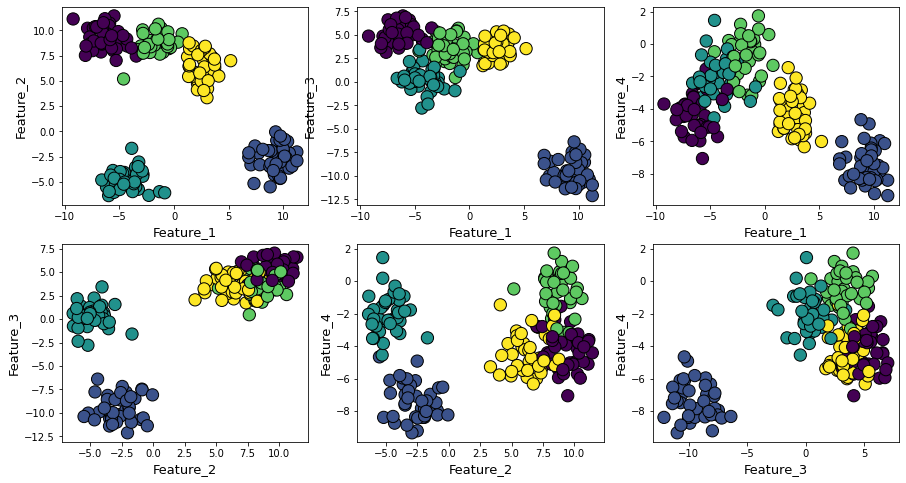

In [ ]:
plt.figure(figsize=(15,8))
for i in range(1,7):
    plt.subplot(2,3,i)
    dim1=lst_vars[i-1][0]
    dim2=lst_vars[i-1][1]
    plt.scatter(df1[dim1],df1[dim2],c=data1[1],edgecolor='k',s=150)
    plt.xlabel(f"{dim1}",fontsize=13)
    plt.ylabel(f"{dim2}",fontsize=13)
    

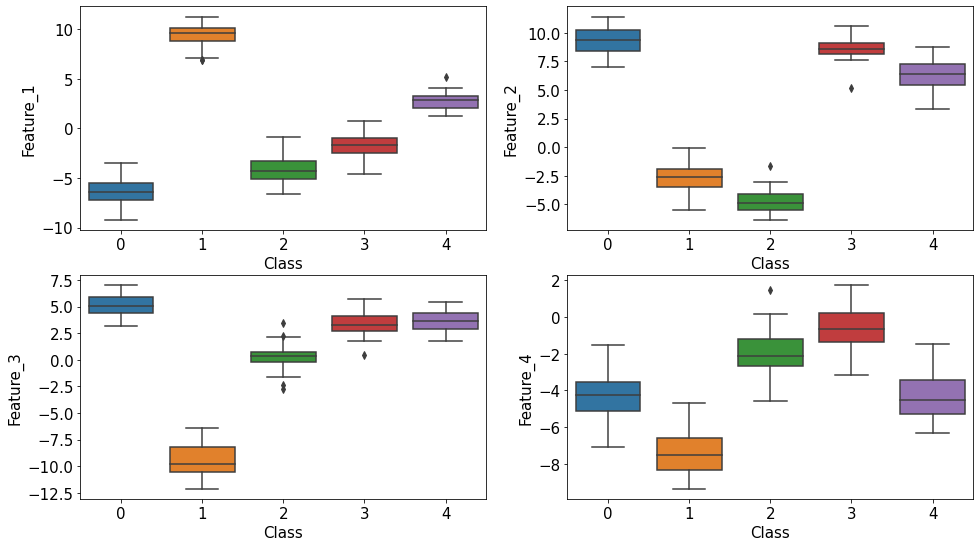

In [ ]:
plt.figure(figsize=(16,14))
for i,c in enumerate(df1.columns):
    plt.subplot(3,2,i+1)
    sns.boxplot(y=df1[c],x=data1[1])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Class",fontsize=15)
    plt.ylabel(c,fontsize=15)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X=df1

In [ ]:
X.head()

,Feature_1,Feature_2,Feature_3,Feature_4
0,-0.492004,8.183862,4.755733,-2.303313
1,-6.412495,9.695315,6.418247,-2.501611
2,9.410935,-0.901716,-7.461346,-7.961420
3,-4.292269,8.443320,4.272737,-2.370466
4,9.880591,-3.611473,-8.130185,-6.347444


In [ ]:
y=data1[1]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:

X_scaled=scaler.fit_transform(X)

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score

In [ ]:
km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    preds = km.predict(X_scaled)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(X_scaled)))
    km_scores.append(-km.score(X_scaled))
    
    silhouette = silhouette_score(X_scaled,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    
    db = davies_bouldin_score(X_scaled,preds)
    db_score.append(db)
    print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))
    
    v_measure = v_measure_score(y,preds)
    vmeasure_score.append(v_measure)
    print("V-measure score for number of cluster(s) {}: {}".format(i,v_measure))
    print("-"*100)

Score for number of cluster(s) 2: -29.52951219273791
Silhouette score for number of cluster(s) 2: 0.5722750699936094
Davies Bouldin score for number of cluster(s) 2: 0.520666693815651
V-measure score for number of cluster(s) 2: 0.47435098761403227
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 3: -11.818546608249278
Silhouette score for number of cluster(s) 3: 0.6361790010431564
Davies Bouldin score for number of cluster(s) 3: 0.48219358239890964
V-measure score for number of cluster(s) 3: 0.7424834172925047
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 4: -7.573401384042119
Silhouette score for number of cluster(s) 4: 0.5582098610281007
Davies Bouldin score for number of cluster(s) 4: 0.6589832834518142
V-measure score for number of cluster(s) 4: 0.905746099275519
-----------------------------------------------------

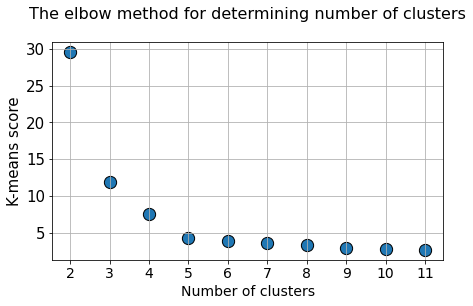

In [ ]:
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

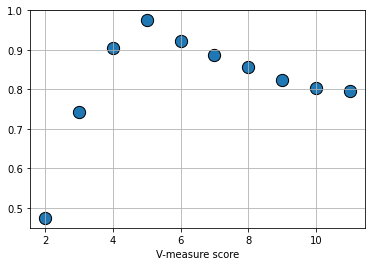

In [ ]:
plt.scatter(x=[i for i in range(2,12)],y=vmeasure_score,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("V-measure score")
plt.show()

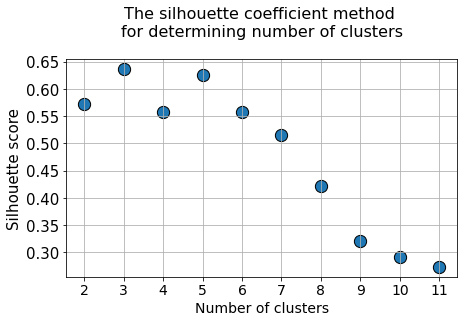

In [ ]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
gm_bic= []
gm_score=[]
for i in range(2,12):
    gm = GaussianMixture(n_components=i,n_init=10,tol=1e-3,max_iter=1000).fit(X_scaled)
    print("BIC for number of cluster(s) {}: {}".format(i,gm.bic(X_scaled)))
    print("Log-likelihood score for number of cluster(s) {}: {}".format(i,gm.score(X_scaled)))
    print("-"*100)
    gm_bic.append(-gm.bic(X_scaled))
    gm_score.append(gm.score(X_scaled))

BIC for number of cluster(s) 2: -819.8407189802468
Log-likelihood score for number of cluster(s) 2: 2.4337298065253496
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 3: -948.6503810974332
Log-likelihood score for number of cluster(s) 3: 2.954440863063867
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 4: -1045.853557415006
Log-likelihood score for number of cluster(s) 4: 3.39613570510335
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 5: -1042.6510545235083
Log-likelihood score for number of cluster(s) 5: 3.5868163491201575
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 6: -998.2904654386036
Log-likelihood score for number of cluster(s) 6: 3.6746017776534474
---

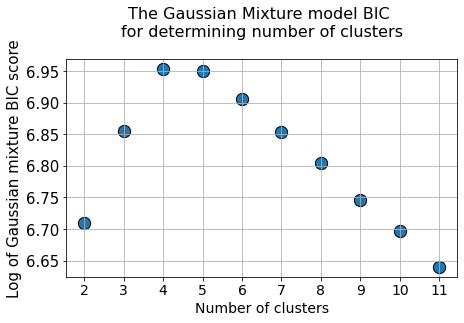

In [ ]:
plt.figure(figsize=(7,4))
plt.title("The Gaussian Mixture model BIC \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=np.log(gm_bic),s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Log of Gaussian mixture BIC score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

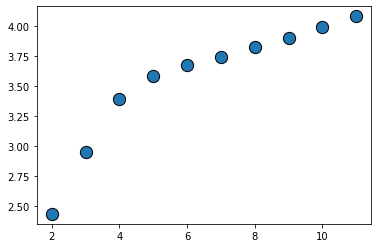

In [ ]:
plt.scatter(x=[i for i in range(2,12)],y=gm_score,s=150,edgecolor='k')
plt.show()